# House Price prediction for beginners

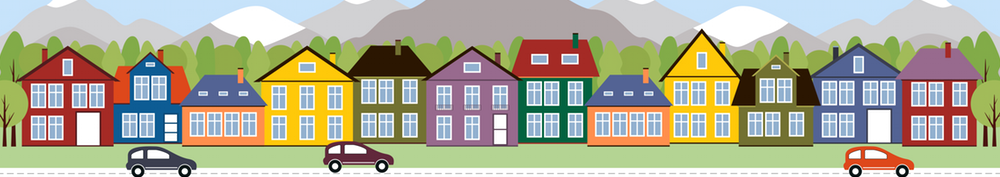

### This kernel includes following topics
*     Importing required libraries
*     Handling Missing values
*     Data Wrangling, convert categorical to numerical
*     Applying the basic Regression models of sklearn
*     Comparing the performance of the Regressors and choosing the best one

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis
%matplotlib inline
sns.set()

### **Loading datasets**

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
# checking the shape of both datasetes
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


**There's one more column in train dataset which is the target variable, we have to seperate it to make a whole dataframe of train and test dataset for the further analysis.**

In [5]:
target = train[['SalePrice']]
# dropping the target variable from train dataset
train.drop(columns=['SalePrice'],axis=1, inplace=True) 

In [6]:
# Now concating both datasets
df = pd.concat([train,test])
df.shape

(2919, 80)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

**We see that we have columns with catogarical data and also numerical data but if we see that there's Id column which is nothing but representing the index so we will drop it becuase it has no relation with the target variable**

**In supervised learning like classification and regression problems we have two type of variables**
* **Feature variables** 
* **Target variables**

**A function we say y=f(x) here y is dependent on the input of x and x has the effect on y as x changes so does y. likely in machine learning we call x the features and y the target variable. With the help of features we predict the target variable.**

### Let's drop the Id column dataset

In [8]:
df.drop(columns=['Id'], axis=1, inplace=True)
df.shape

(2919, 79)

## Handling missing data
**Handling missing data requires the great strategy and analysis to fit the model, **
**Sometimes missing data is on purpose and sometimes it's not. So we will handle by looking at the number of missing data if there's missing data more than 30% then we will drop those columns and if less then we will replace the numerical columns with their mean and catogarical columns with their mode**

**Rather than handling the missing data  of train and test dataset individually it's better to concat them but before that we have to seperate the target column from train dataset to make them have equal number of features.**

**Now let's visualize the missing values of whole dataset**

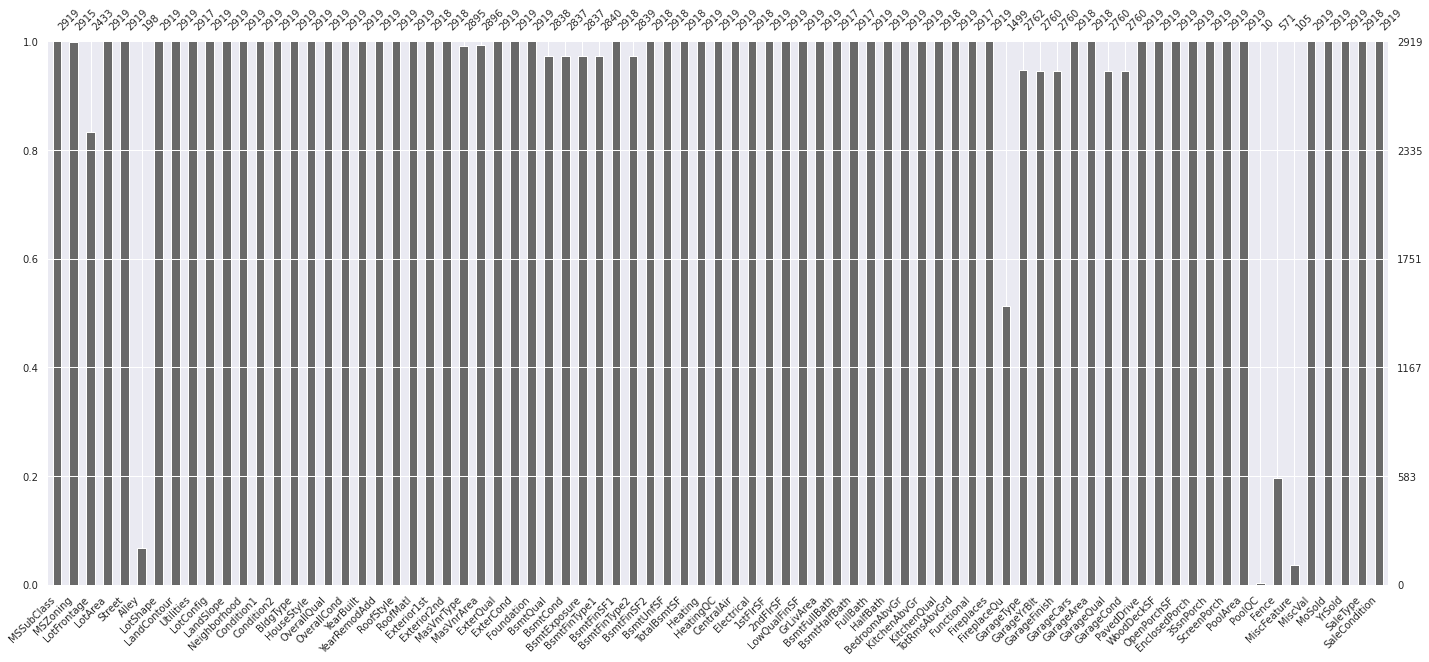

In [9]:
plt.figure(figsize=(16,12))
msno.bar(df, labels=True, fontsize=(10))

**we see that there are a few columns having great number of missing values but let's check them percent wise**

In [10]:
#categorical variables having missing values more than 30%
for col in df:
    if df[col].dtype == 'object':
        if (df[col].isnull().sum()/df[col].isnull().count())*100 >=30:
            print(col)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


**In catogarical we have 5 columns with more than 30% of missing data so we're going to remove them**

In [11]:
df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

**Now we will fill the rest of categorical columns with their most frequent value**

In [12]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

**Now let's do it same for the Numerical data first let's see what percent missing values we have in Numerical columns** 

In [13]:
# Now for numericals
check = False
for col in df:
    if df[col].dtype != 'object':
        if (df[col].isnull().sum()/df[col].isnull().count())*100 >=30:
            print(col)
        else:
            check = True
if check:
    print('We do not have missing data more than 30%')

We do not have missing data more than 30%


In [14]:
# let's see how much data we have missing in numerical data
for col in df:
    if df[col].dtype != 'object':
        print(df[col].isnull().sum(), end=' ')

0 486 0 0 0 0 0 23 1 1 1 1 0 0 0 0 2 2 0 0 0 0 0 0 159 1 1 0 0 0 0 0 0 0 0 0 

**As per trend to replace with their mean i don't think so it's good choice to do so becuase missing data has the importance becuase as I earlier mentioned above that sometimes data is missing on purpose so rather than filling it with mean I am going to fill it with 0, near to me zero seems meaningful in handling the data**

In [15]:
for col in df:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(0)

**Lets see if we are done with missing values**

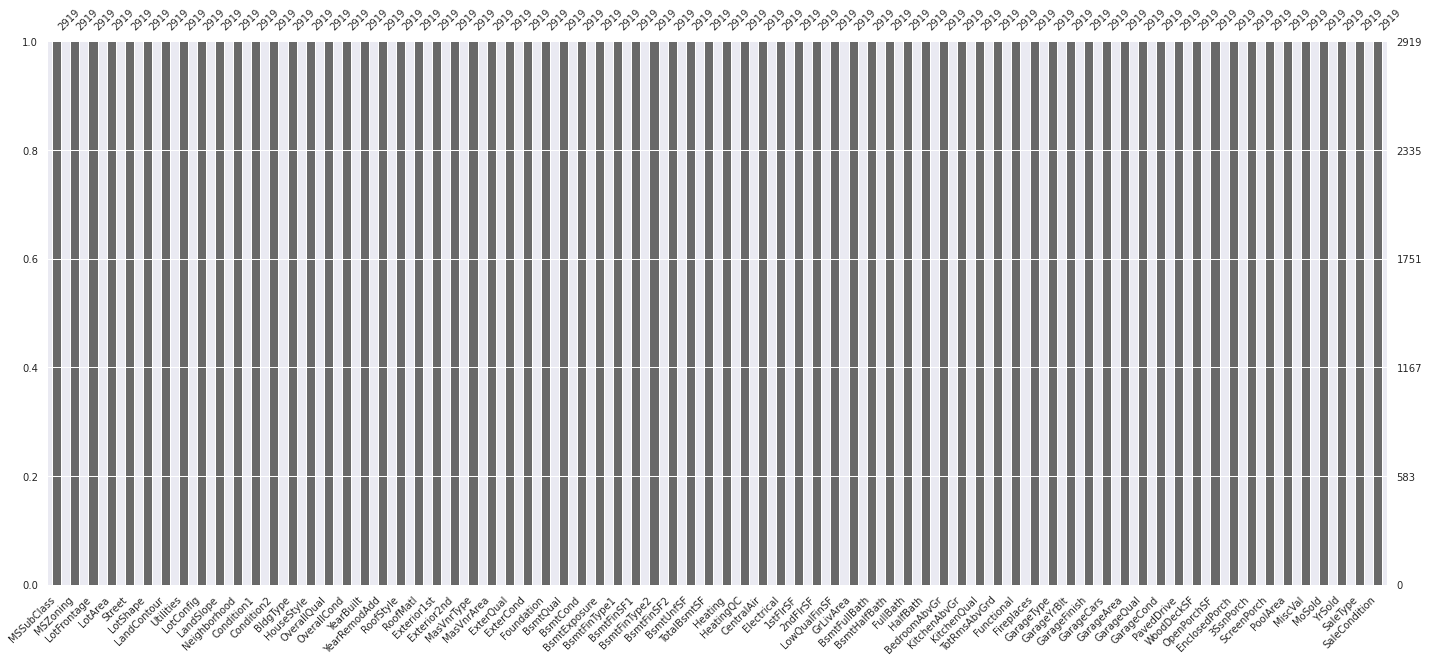

In [16]:
plt.figure(figsize=(16,12))
msno.bar(df, labels=True, fontsize=(10))

**Hopefully we don't have any missing value left in the dataset**

**there are object type columns having catogarical data As we know that ML models work on numeric data not on catogarical so we will perfom the one hot encoding to convert catogarical features into numeric and for that pandas has a function named as get_dummies() which itself creates the features from catogaries. Then check their dimensions.**

In [17]:
df = pd.get_dummies(df)
df.shape

(2919, 270)

### Normalizing the data
**It's better to scale the data within the range of 0 and 1 before fitting to model**

In [18]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df))
df_scaled.columns = df.columns
df_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.067093,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.823529,0.067093,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.000000,0.511182,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.382353,0.198083,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### After EDA we have to split the datsaet back into two datasets train and dataset

In [19]:
train = df_scaled.iloc[:1460,:]
test = df_scaled.iloc[1460:,:]
print(train.shape)
print(test.shape)

(1460, 270)
(1459, 270)


### Now for training the model we need to split up the train dataset and target variable into X_train,X_val,y_train,y_val variables.

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train,target,test_size=0.2,random_state=1)

### We are going to apply few models and let's see which results best

**Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_preds = lr.predict(X_val)

**Decission Tree**

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_val)

**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_val)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**XGBoost**

In [24]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_val)

**Let's compare the models with their mean absolute error**

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
compare = {'Models':['LinearRegression','DecissionTree','RandomForest','XGBoost'],
          'MeanAbsoluteError':[mean_absolute_error(lr_preds,y_val), mean_absolute_error(dt_preds,y_val), mean_absolute_error(rf_preds,y_val),
                              mean_absolute_error(xgb_preds,y_val)]}
pd.DataFrame(compare)

,Models,MeanAbsoluteError
0,LinearRegression,4.750760e+13
1,DecissionTree,2.557354e+04
2,RandomForest,1.653096e+04
3,XGBoost,1.645228e+04


**So we are going to test on xgboost model**

In [27]:
test_values = xgb.predict(test)
test_values

array([129427.3 , 156915.75, 183132.17, ..., 169863.06, 126803.01,
       227885.1 ], dtype=float32)

### loading the submission dataset to replace it's values of SalePrice column with our predicted values of test dataset

In [28]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = test_values
submission

,Id,SalePrice
0,1461,129427.296875
1,1462,156915.750000
2,1463,183132.171875
3,1464,185200.203125
4,1465,167996.687500
...,...,...
1454,2915,80405.914062
1455,2916,79942.000000
1456,2917,169863.062500
1457,2918,126803.007812


In [29]:
submission.to_csv('Submission_3.csv', index=False)